In [14]:
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
# tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)

In [3]:
encoder = info.features["text"].encoder
print(encoder.vocab_size)

8185


In [4]:
sample = "This is a very simple string written by dsonyy"
encoded_sample = encoder.encode(sample)
original_sample = encoder.decode(encoded_sample)

print(sample)
print(encoded_sample)
print(original_sample)

This is a very simple string written by dsonyy
[62, 9, 4, 67, 1392, 5875, 7961, 696, 43, 1761, 5917, 8050]
This is a very simple string written by dsonyy


In [5]:
for ts in encoded_sample:
    print("{}\t---->\t{}".format(ts, encoder.decode([ts])))

62	---->	This 
9	---->	is 
4	---->	a 
67	---->	very 
1392	---->	simple 
5875	---->	string
7961	---->	 
696	---->	written 
43	---->	by 
1761	---->	ds
5917	---->	ony
8050	---->	y


In [7]:
for train_example, train_label in train_data.take(1):
    print(train_example[:10].numpy())
    print(encoder.decode(train_example[:10]))
    print(train_label.numpy())

[  62   18   41  604  927   65    3  644 7968   21]
This was an absolutely terrible movie. Don't 
0


In [8]:
BUF_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUF_SIZE)
    .padded_batch(32)
)

test_batches = (
    test_data
    .padded_batch(32)
)

In [9]:
for example_batch, label_batch in train_batches.take(2):
    print(example_batch.shape)
    print(label_batch.shape)

(32, 1021)
(32,)
(32, 1218)
(32,)


In [10]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="adam",
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [12]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.6813 - accuracy: 0.5005 - val_loss: 0.6634 - val_accuracy: 0.5042
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 0.6197 - accuracy: 0.5512 - val_loss: 0.5941 - val_accuracy: 0.5823
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.5413 - accuracy: 0.6640 - val_loss: 0.5423 - val_accuracy: 0.7927
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4737 - accuracy: 0.7519 - val_loss: 0.4817 - val_accuracy: 0.7458
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4207 - accuracy: 0.8002 - val_loss: 0.4445 - val_accuracy: 0.7844
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3797 - accuracy: 0.8363 - val_loss: 0.4176 - val_accuracy: 0.7948
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3493 - accuracy: 0.8528 - val_loss: 0.3964 - val_accuracy: 0.8448
Epoch 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

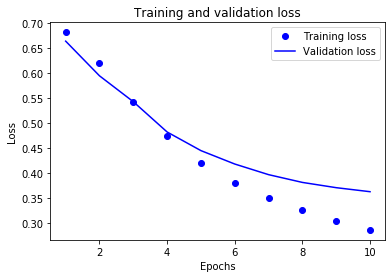

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

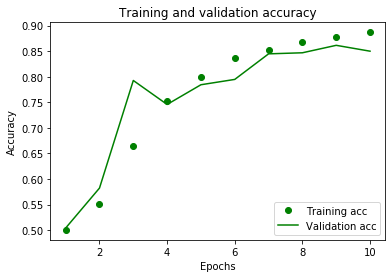

In [23]:
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')